# Linear Regression

# Use Case: Score Prediction

Problem Statement:

Build a model to predict salary based on the number years of experience.



Data:

Use the Salary_Data dataset and analyse the relationship between YearsExperience and Salary variables using a linear regression.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Import Dataset

In [2]:
d1 = pd.read_csv('../DATASET/Salary_Data.csv')

In [3]:
d1.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# Exploratory Data Analysis(EDA)

In [4]:
d1.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
d1.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [6]:
d1.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [8]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [9]:
print(d1.shape)

(30, 2)


In [10]:
d1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


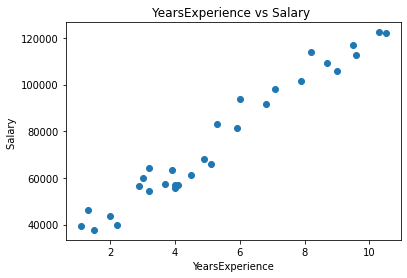

In [11]:
from matplotlib import pyplot as plt
plt.scatter(d1['YearsExperience'],d1["Salary"])
plt.title('YearsExperience vs Salary ')
plt.xlabel("YearsExperience")
plt.ylabel('Salary ')
plt.show()

# Select  attribute as  dependent and independent

In [20]:
d1.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [12]:
x=d1.iloc[:,:1].values
y=d1.iloc[:,1].values

In [13]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [14]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


# Splitting Data into Training and Testing Dataset

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
print("x_train")
print(x_train)
print("x_test")
print(x_test)

x_train
[[ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]
x_test
[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


x_test
[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


In [27]:
print("X:",x)

print("x_train:",x_train)
print("x_test",x_test)

X: [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
x_train: [[ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]
x_test [[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


In [28]:
print("Y:",y)

print("y_train:",y_train)
print("y_test",y_test)

Y: [ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]
y_train: [112635  55794  83088 101302  56642  66029  64445  61111 113812  91738
  46205 121872  60150  39891  81363  93940  57189  54445 105582  43525
  39343  98273  67938  56957]
y_test [ 37731 122391  57081  63218 116969 109431]


# Creating Linear Regression Model


                                                                                                                     

# y=aX+b

Where X=Predictor/Independant variable, 
Y=Response/Dependant Variable, 
a= Coefficient and b=Intercept

In this example, X is YearsExperience and Y is Salary.


In [29]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train) # Training the algorithm

LinearRegression()

# Interpreting Model Coefficients

In [30]:
print(regressor.intercept_)

26780.09915062818


In [31]:
print(regressor.coef_)

[9312.57512673]


# Y=ax+b

Salary=9312.57512673(YearsExperience)+26780.09915062818

# Making Predictions with Our Model

In [32]:
y_pred=regressor.predict(x_test)

In [33]:
print(y_pred)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


# y_test [ 37731 122391  57081  63218 116969 109431]

In [34]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)

   Actual      Predicted
0   37731   40748.961841
1  122391  122699.622956
2   57081   64961.657170
3   63218   63099.142145
4  116969  115249.562855
5  109431  107799.502753


# Ploting  Linear Regression Model best line

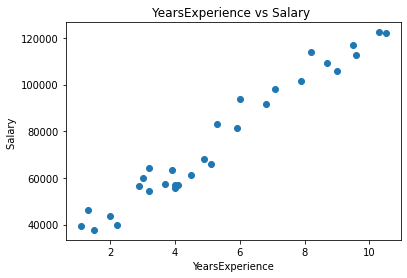

In [35]:
from matplotlib import pyplot as plt
plt.scatter(d1['YearsExperience'],d1["Salary"])
plt.title('YearsExperience vs Salary ')
plt.xlabel("YearsExperience")
plt.ylabel('Salary ')
plt.show()

## The plot() function is used to draw points (markers) in a diagram.
    By default, the plot() function draws a line from point to point.
    The function takes parameters for specifying points in the diagram.
    Parameter 1 is an array containing the points on the x-axis.
    Parameter 2 is an array containing the points on the y-axis.
    If we need to plot a line from (1, 3) to (8, 10), we have to pass two arrays [1, 8] and [3, 10] to the plot function.

    plt.plot(xpoints, ypoints)
    plt.show()

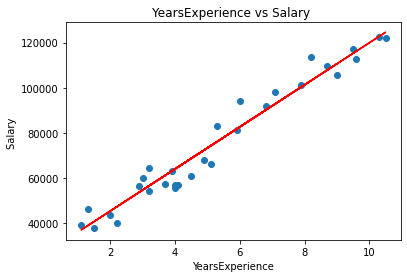

In [39]:
from matplotlib import pyplot as plt
plt.plot(x_train,regressor.predict(x_train), color='red')
plt.scatter(d1['YearsExperience'],d1["Salary"])
plt.title('YearsExperience vs Salary ')
plt.xlabel("YearsExperience")
plt.ylabel('Salary ')
plt.show()

# Model Evaluation Metrics

In [28]:
from sklearn import metrics
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error 2446.1723690465055


In [29]:
print('Mean Squared Error',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error 12823412.298126549


In [30]:
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error 3580.979237321343


In [40]:
print(x_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


# Mean Absolute Error (MAE)

# MAE=  [  ∑ abs(actual_value - prdicted_value)  ] / n



mi=abs(actual_value-predicted_value)

m1=abs(37731.0 - 40748.961841)=3017.961841

m2=abs(122391.0 - 122699.622956)=308.6229559

m3=abs(57081.0 - 64961.657170)=7880.65717

m4=abs(63218.0 - 63099.142145)=118.8578551

m5=abs(116969.0 - 115249.562855)=1719.437145

m6=abs(109431.0 - 107799.502753)=1631.497247


MAE=(m1 + m2 + m3 + m4 + m5 + m6 )/ 6

MAE=(3017.961841+308.6229559+7880.65717+118.8578551+1719.437145+1631.497247) / 6

MAE=(14677.03421) / 6

MAE=2446.172369

# Mean Squared Error (MSE)

# MSE= [ ∑ (actual_value - prdicted_value)² ] / n

mi= (actual_value - prdicted_value)²


m1= (37731.0 - 40748.961841)² = 9108093.672

m2= (122391.0 - 122699.622956)² = 95248.12893

m3= (57081.0 - 64961.657170)² = 62104757.43

m4= (63218.0 - 63099.142145)² = 14127.18973

m5= (116969.0 - 115249.562855)² = 2956464.097

m6= (109431.0 - 107799.502753)² = 2661783.266


MSE=( m1 + m2 + m3 + m4 + m5 + m6 ) / 6

MSE=(9108093.672+95248.12893+62104757.43+14127.18973+2956464.097+2661783.266) / 6

MSE=(76940473.79) / 6

MSE=12823412.3


# Root Mean Squared Error (RMSE)

RMSE= SQRT(MSE)
RMSE= SQRT(12823412.3)
RMSE= 3580.979237

# R-Squared

In [32]:
train_score_lr = regressor.score(x_train, y_train)
test_score_lr = regressor.score(x_test, y_test)

print("The train score for lr model is: ", train_score_lr)
print("The test score for lr model is: ",test_score_lr)



The train score for lr model is:  0.9411949620562126
The test score for lr model is:  0.988169515729126


In [33]:
train_score_lr = regressor.score(x_train, y_train)
test_score_lr = regressor.score(x_test, y_test)

print("The train score for lr model is: ", train_score_lr)
print("The test score for lr model is: ",test_score_lr)



The train score for lr model is:  0.9411949620562126
The test score for lr model is:  0.988169515729126


In [34]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.988169515729126
